In [ ]:
FILENAME = 'CHANGE'
TITLE = 'LIGAND, CATION'

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [ ]:
read = np.loadtxt(FILENAME + '.csv', delimiter=",", dtype='str')
v_labels = read[:,0][1:]
h_labels = read[0][1:]
data = read[1:,1:].astype('float64')

[[ 2.          1.5         1.          0.5         0.1234      0.1234
   0.1234      0.1234    ]
 [ 2.          1.667       1.333       1.          0.667       0.333
   0.1234      0.1234    ]
 [ 2.          0.1234      0.1234      0.1234      0.1234      0.1234
   0.1234      0.1234    ]
 [-2.         -2.         -1.71428571 -1.42857143 -1.14285714 -0.85714286
  -0.57142857 -0.28571429]
 [-2.         -2.         -1.6        -1.2        -0.8        -0.4
   0.1234      0.1234    ]
 [-2.         -1.6        -1.2        -0.8        -0.4         0.1234
   0.1234      0.1234    ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.        ]]


In [ ]:
#Modifying RdBu by setting 0.1234 equal to gray, 0.1010 to purple --> colormap "custom"
cmap_array = matplotlib.cm.get_cmap('RdBu', 256)((np.linspace(0, 1, 256)))
cmap_indexer = lambda i: int( (i/6 + 0.5) * 256 )
cmap_array[cmap_indexer(0.1234)] = [0.3, 0.3, 0.3, 0.75]
cmap_array[cmap_indexer(0.1111)] = [0.5, 0.3, 0.8, 0.75]

if FILENAME == 'rhps4_k+':
  cmap_array[cmap_indexer(0.2222)] = [0.5, 0.3, 0.8, 0.83]
  cmap_array[cmap_indexer(0.3333)] = [0.5, 0.3, 0.8, 0.92]
  cmap_array[cmap_indexer(0.4444)] = [0.5, 0.3, 0.8, 1]

elif FILENAME == 'tmpyp4_k+': #For TmPyP4 K+:
  cmap_array[cmap_indexer(0.2222)] = [0.5, 0.3, 0.8, 1]
  cmap_array[cmap_indexer(0.8888)] = [0.5, 0.3, 0.8, 0.92]
  cmap_array[cmap_indexer(0.7777)] = [0.5, 0.3, 0.8, 0.86]
  cmap_array[cmap_indexer(0.6666)] = [0.5, 0.3, 0.8, 0.71]
  cmap_array[cmap_indexer(0.5555)] = [0.5, 0.3, 0.8, 0.57]
  cmap_array[cmap_indexer(0.4444)] = [0.5, 0.3, 0.8, 0.43]
  cmap_array[cmap_indexer(0.3333)] = [0.5, 0.3, 0.8, 0.29]
  cmap_array[cmap_indexer(0.2211)] = [0.5, 0.3, 0.8, 0.14]



custom = matplotlib.colors.ListedColormap(cmap_array, name = 'custom')

<ipython-input-24-235b9addd0c0>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap_array = matplotlib.cm.get_cmap('RdBu', 256)((np.linspace(0, 1, 256)))


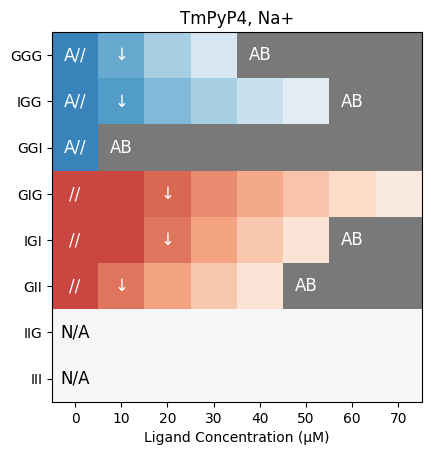

In [ ]:
#Adapted from https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html

fig, ax = plt.subplots()
im = ax.imshow(data, cmap = custom, vmin = -3, vmax = 3)

ax.set_xticks(np.arange(h_labels.size), labels = h_labels)
ax.set_yticks(np.arange(v_labels.size), labels = v_labels)

for i in range(v_labels.size):
    alreadyAB = False
    currentTrend = ''
    for j in range(h_labels.size):
        aColor = 'w'
        aSize = 'large'
        point = data[i, j]
        if j == 0:
          if point == 2:
            text = 'A//'
          elif point == -2:
            text = '//'
          elif point == 0.101:
            text = 'Hybrid'
            aSize = 'small'
          elif point == 0:
            text = 'N/A'
            aColor = 'black'
        elif point == 0.1234:
          if alreadyAB:
            text = ''
          else:
            text = 'AB'
            alreadyAB = True
        elif abs(point) > abs(data[i, j-1]):
          if currentTrend == '↑':
            text = ''
          else:
            text = currentTrend = '↑'
        elif abs(point) < abs(data[i, j-1]):
          if currentTrend == '↓':
            text = ''
          else:
            text = currentTrend = '↓'
        else:
          text = ''
          if point != 2 and point != data[i, j-1]:
            print('unforseen case' + str(point))
        ax.text(j, i, text, ha="center", va="center", color=aColor, fontweight = 'medium', fontsize = aSize)

ax.set_title(TITLE)
ax.set_xlabel('Ligand Concentration (μM)')

plt.savefig(FILENAME + '.png', dpi = 250)